# Types of machine learning

![](./images/ml_types.jpg)

(Image from https://technovert.com/introduction-to-machine-learning/)

# An introduction to classification with machine learning

In classification tasks we seek to classify a 'case' into one or more classes, given one or more input features. This may be extended to enquiring about probability of classification. Examples of classification include:

* What diagnosis should this patient be given?
* What is the probability that an emergency department will breach four-hour waiting in the next two hours?
* What treatment should a patient be given?
* What is the probability that a patient will be re-admitted?

**Reflection:**
1. Can you think of three occasions where people make classifications?
- cataract surgery needed or not
- glaucoma present or not
- diabetic retinopathy present or not
1. Can you think of an example where it might be useful to provide automated classification?
all the above! DESP has a whole system of grading in existence. WHy are we not using machine learning on it at the moment? 

## Regression and logistic regression

With ordinary regression we are trying to predict a value given one or more input features.

![](./images/regression.png)

*(Flashcard images from machinelearningflashcards.com)*

With logistic regression we are trying to the predict the probability, given one or more inputs, that an example belongs to a particular class (e.g. *pass* vs *fail* in an exam). Our training data has the actual class (which we turn into 0 or 1), but the model returns a probability of a new example being in either class 0 or 1. The logistic regression fit limits the range of output to between 0 and 1 (whereas a linear regression could predict outside of this range).

![](./images/logistic_regression.png)


$$P = \dfrac{e^{a+bX}}{1+e^{a+bX}}$$

![](./images/logistic_regression_equation.png)


## Import libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


## Data scaling

It is usual to scale input features in machine learning, so that all features are on a similar scale. Consider these two features (we will create artifical data).

In [5]:
# Create two sets of data with different means and standard deviations
np.random.seed(123) # The random seed simply "fixes" the random number generation to make it reproducible
x1 = np.random.normal(50,10,size=1000) # 1000 random numbers with mean 50 and standard deviation 10
x2 = np.random.normal(150,30,size=1000) # 1000 random numbers with mean 150 and standard deviation 30

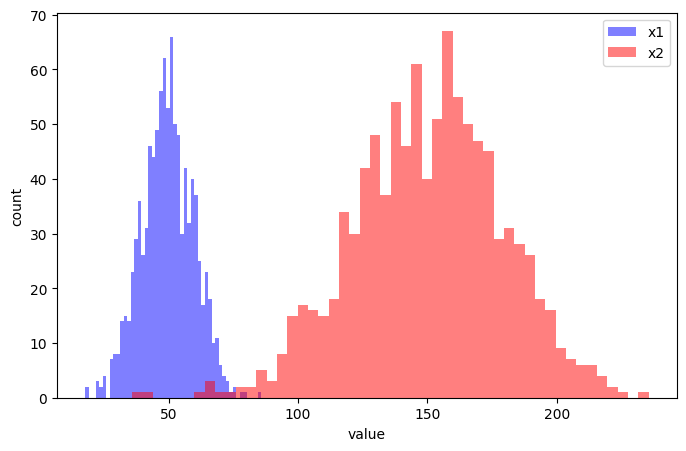

In [6]:
# Set up single plot
fig, ax = plt.subplots(figsize=(8,5)) # Create a figure and a set of subplots
# Add histogram of x1
ax.hist(x1, bins=50, alpha=0.5, color='b', label='x1') # alpha is the transparency of the bars
# Add histogram of x2
ax.hist(x2, bins=50, alpha=0.5, color='r', label='x2') #
# Add labels
ax.set_xlabel('value')
ax.set_ylabel('count')
# Add legend
ax.legend()
# Finalise and show plot
plt.show()

### MinMax Normalisation

With MinMax normalisation we scale all values between 0 and 1.

$$z = \frac{x-min(x)}{max(x) - min(x)}$$

A less common alternative is to scale between -1 and 1.

$$z = -1 + 2\frac{x-min(x)}{max(x) - min(x)}$$

Here we will use 0-1 normalisation.  Here we do this manually, but for real
data we can use a MinMaxScaler (as seen in the lecture) :

In [7]:
x1_norm = (x1 - x1.min()) / (x1.max() - x1.min())
x2_norm = (x2 - x2.min()) / (x2.max() - x2.min())

### Standardisation

With standardisation we scale data such that all features have a mean of 0 and standard deviation of 1. To do this we simply subtract by the mean and divide by the standard deviation.

$$z = \frac{x-\mu}{\sigma}$$

Again, here we do this manually, but for real data we'd typically use a StandardScaler, as seen in the lecture :

In [8]:
x1_std = (x1 - x1.mean()) / x1.std()
x2_std = (x2 - x2.mean()) / x2.std()

### Plotting the transformations

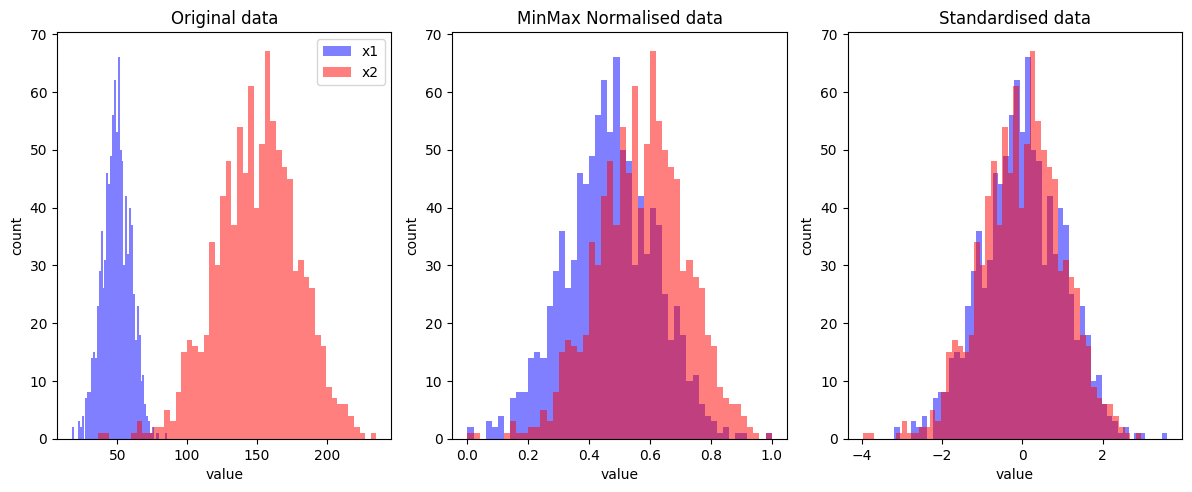

In [10]:
# Set up three subplots (12 x 5 inch plot)
fig, axs = plt.subplots(1, 3, figsize=(12,5)) # 1 row and 3 columns of subplots

# Plot original data in axs[0]
axs[0].hist(x1, bins=50, alpha=0.5, color='b', label='x1')
axs[0].hist(x2, bins=50, alpha=0.5, color='r', label='x2')
axs[0].set_xlabel('value')
axs[0].set_ylabel('count')
axs[0].legend()
axs[0].set_title('Original data')

# Plot normalised data in axs[1]
axs[1].hist(x1_norm, bins=50, alpha=0.5, color='b', label='x1 norm')
axs[1].hist(x2_norm, bins=50, alpha=0.5, color='r', label='x2 norm')
axs[1].set_xlabel('value')
axs[1].set_ylabel('count')
axs[1].set_title('MinMax Normalised data')

# Plot standardised data in axs[2]
axs[2].hist(x1_std, bins=50, alpha=0.5, color='b', label='x1 norm')
axs[2].hist(x2_std, bins=50, alpha=0.5, color='r', label='x2 norm')
axs[2].set_xlabel('value')
axs[2].set_ylabel('count')
axs[2].set_title('Standardised data')

# Adjust padding between subplots and show figure
fig.tight_layout(pad=1.0)
plt.show()

### Notes on scaling

Most commonly, with classification:
* Decision trees and random forests require no scaling
* Linear regression and support vector machines use standardised input data
* Neural networks use MinMax normalised input data

Later we will see that when we split data into training and test sets we will scale based on min/max or mean/std of the training set data only. We will also use the scaling methods provided by the SciKit-Learn library rather than using our own.